### Загрузите данные и подготовьте их к анализу

Целью исследования является анализ причин убытков компании, являющейся правообладателем развлекательного приложения Procrastinate Pro+, несмотря на огромные вложения в рекламу. Задача исследования заключается в выработке рекомендаций для отдела маркетинга для изменения стратегии привлечения пользователей.
    
В нашем распоряжении есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.

Необходимо проанализировать следующие аспекты:
- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).


In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime, timedelta
import numpy as np
import seaborn as sns

In [2]:
visits = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
costs = pd.read_csv('/datasets/costs_info_short.csv')

display(visits.head())
display(visits.info())

display(orders.head())
display(orders.info())

display(costs.head())
costs.info()


,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


None

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Переименовываем столбцы во всех таблицах:

In [3]:
visits.columns = ['user_id', 'region', 'device', 'channel', 'session_start', 'session_end']
orders.columns = ['user_id', 'event_dt', 'revenue']
costs.columns = ['dt', 'channel', 'costs']
display(visits.columns)
display(orders.columns)
costs.columns

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')

Index(['user_id', 'event_dt', 'revenue'], dtype='object')

Index(['dt', 'channel', 'costs'], dtype='object')

Проверяем наличие пропусков в данных:

In [4]:
visits.isna().sum()

user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64

In [5]:
orders.isna().sum()

user_id     0
event_dt    0
revenue     0
dtype: int64

In [6]:
costs.isna().sum()

dt         0
channel    0
costs      0
dtype: int64

Проверяем уникальные значения столбцов данных:

In [7]:
display(visits['region'].unique())
display(visits['device'].unique())
visits['channel'].unique()

array(['United States', 'UK', 'France', 'Germany'], dtype=object)

array(['iPhone', 'Mac', 'Android', 'PC'], dtype=object)

array(['organic', 'TipTop', 'RocketSuperAds', 'YRabbit', 'FaceBoom',
       'MediaTornado', 'AdNonSense', 'LeapBob', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

In [8]:
costs['channel'].unique()

array(['FaceBoom', 'MediaTornado', 'RocketSuperAds', 'TipTop', 'YRabbit',
       'AdNonSense', 'LeapBob', 'OppleCreativeMedia', 'WahooNetBanner',
       'lambdaMediaAds'], dtype=object)

Проверим наличие явных дубликатов в таблицах:

In [9]:
display(visits.duplicated().sum())
display(orders.duplicated().sum())
costs.duplicated().sum()

0

0

0

Перевод данных к нужному типу:

In [10]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date
#visits.info()
#orders.info()
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


**Вывод: в результате проведенной предобработки данные были проверены на наличие пропусков, явных дубликатов, уникальность значений в столбцах. Названия столбцов были приведены к "змеиному" регистру. Данные столбцов со временем были приведены к нужному формату.**

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.


Функция для создания пользовательских профилей:

In [11]:
def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

Функция для расчёта удержания:

In [12]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

Функция для расчёта конверсии:

In [13]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

Функция для расчёта LTV и ROI:

In [14]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

Функция для сглаживания фрейма:

In [15]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

Функция для визуализации удержания:

In [16]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

Функция для визуализации конверсии:

In [17]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

Функция для визуализации LTV и ROI:

In [18]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

**Вывод: все необходимые функции заданы.**

### Исследовательский анализ данных


Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.

In [19]:
profiles = get_profiles(visits, orders, costs)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [20]:
min_dt = profiles['dt'].min()
max_dt = profiles['dt'].max()
display(min_dt)
max_dt

datetime.date(2019, 5, 1)

datetime.date(2019, 10, 27)

`Вывод: мы получили профили пользователей. Минимальная дата привлечения пользователей - 01.05.2019, максимальная - 27.10.2019.`

Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [21]:
profiles_country = profiles.groupby('region').agg({'user_id':'count'}).rename(columns={'user_id':'all_country'})
profiles_country['pay_country'] = profiles.loc[profiles['payer'] == True].groupby('region').agg({'user_id':'count'})
profiles_country['%'] = profiles_country['pay_country']/profiles_country['all_country']*100
profiles_country.sort_values(by='%', ascending=False)


,all_country,pay_country,%
region,,,
United States,100002,6902,6.901862
Germany,14981,616,4.111875
UK,17575,700,3.982930
France,17450,663,3.799427


`Вывод: большинство пользователей приходит из США. Большинство платящих пользователей также приходится на США.`

Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [22]:
profiles_device = profiles.groupby('device').agg({'user_id':'count'}).rename(columns={'user_id':'all_device'})
profiles_device['pay_device'] = profiles.loc[profiles['payer'] == True].groupby('device').agg({'user_id':'count'})
profiles_device['%'] = profiles_device['pay_device']/profiles_device['all_device']*100
profiles_device.sort_values(by='%', ascending=False)

,all_device,pay_device,%
device,,,
Mac,30042,1912,6.364423
iPhone,54479,3382,6.207897
Android,35032,2050,5.851793
PC,30455,1537,5.046790


`Вывод: большинство пользователей пользуется Iphone. Однако доля платящих пользователей от всего количество людей, пользующихся тем или иным устройством, наибольшая для Mac.`

Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [23]:
profiles_channel = profiles.groupby('channel').agg({'user_id':'count'}).rename(columns={'user_id':'all_channel'})
profiles_channel['pay_channel'] = profiles.loc[profiles['payer'] == True].groupby('channel').agg({'user_id':'count'})
profiles_channel['%'] = profiles_channel['pay_channel']/profiles_channel['all_channel']*100
profiles_channel.sort_values(by='%', ascending=False)


,all_channel,pay_channel,%
channel,,,
FaceBoom,29144,3557,12.204914
AdNonSense,3880,440,11.340206
lambdaMediaAds,2149,225,10.469986
TipTop,19561,1878,9.600736
RocketSuperAds,4448,352,7.913669
WahooNetBanner,8553,453,5.296387
YRabbit,4312,165,3.826531
MediaTornado,4364,156,3.574702
LeapBob,8553,262,3.063253


In [24]:
perc = profiles_channel.loc['organic', ['all_channel']] / profiles_channel['all_channel'].sum() *100
perc

all_channel    37.623993
Name: organic, dtype: float64

`Вывод: большинство платящих пользователей пришло из каналов FaceBoom, AdNonDense, lambdaMediaAds > 10 %. На "органическую" публику приходится больше 37 % привлеченных пользователей, однако, они превращаются в покупателей реже всего.`

**Вывод:** 
- Были составлены профили пользователей. Минимальной датой привлечения пользователей является - 01.05.2019, максимальной - 27.10.2019;
- Большинство пользователей приходит из США, меньше всего из Германии. Большинство платящих пользователей также приходится на США, меньше всего платящих пользователей находится во Франции;
- Большинство пользователей пользуется Iphone. Android, Mac и PC используют со схожей интенсивностью. Однако доля платящих пользователей от всего количество людей, пользующихся тем или иным устройством, наибольшая для Mac, наименьшая - для PC;
- Большинство платящих пользователей пришло из каналов FaceBoom, AdNonDense, lambdaMediaAds > 10 %. На "органическую" публику приходится больше 37 % привлеченных пользователей, однако, они превращаются в покупателей реже всего.

### Маркетинг


Посчитайте общую сумму расходов на маркетинг.

In [25]:
sum_cost = costs['costs'].sum()
sum_cost

105497.30000000002

`Вывод: общая сумма расходов на маркетинг составляет 105497.`

Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.

In [26]:
div_costs = costs.groupby('channel').agg({'costs':'sum'}).rename(columns={'costs':'div_costs'})
div_costs.sort_values(by='div_costs', ascending=False)
div_costs['%'] = div_costs['div_costs'] / sum_cost * 100
div_costs.sort_values(by='%', ascending=False)

,div_costs,%
channel,,
TipTop,54751.30,51.898295
FaceBoom,32445.60,30.754910
WahooNetBanner,5151.00,4.882589
AdNonSense,3911.25,3.707441
OppleCreativeMedia,2151.25,2.039152
RocketSuperAds,1833.00,1.737485
LeapBob,1797.60,1.703930
lambdaMediaAds,1557.60,1.476436
MediaTornado,954.48,0.904744


`Вывод: большинство трат приходится на рекламные источники: TipTop и FaceBoom. Траты на остальные источники составляют менее 5 % от общих затрат.`

Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.

In [27]:
costs['dt'] = pd.to_datetime(costs['dt'])
costs['week'] = costs['dt'].dt.isocalendar().week
costs['month'] = costs['dt'].dt.month
costs.head()

,dt,channel,costs,week,month
0,2019-05-01,FaceBoom,113.3,18,5
1,2019-05-02,FaceBoom,78.1,18,5
2,2019-05-03,FaceBoom,85.8,18,5
3,2019-05-04,FaceBoom,136.4,18,5
4,2019-05-05,FaceBoom,122.1,18,5


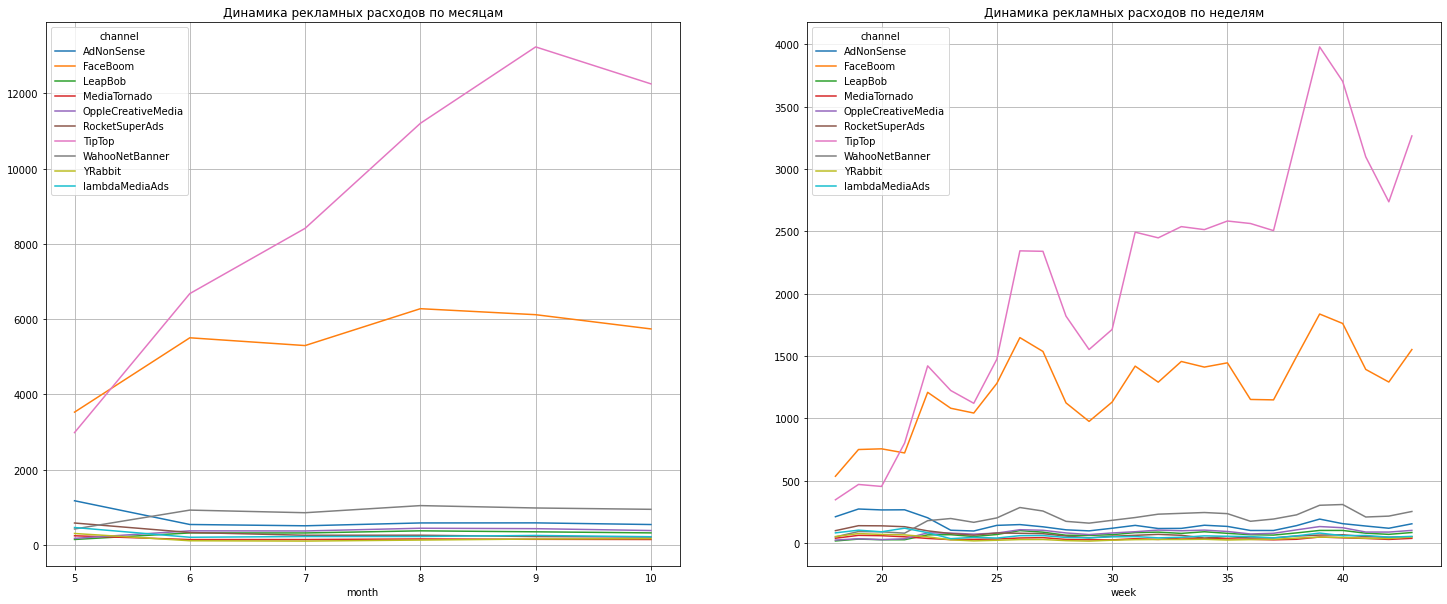

In [28]:
plt.figure(figsize=(25, 10))
costs.pivot_table(index='month', columns='channel', values='costs', aggfunc='sum').plot(grid=True, ax=plt.subplot(1,2,1))
plt.title('Динамика рекламных расходов по месяцам')
costs.pivot_table(index='week', columns='channel', values='costs', aggfunc='sum').plot(grid=True, ax=plt.subplot(1,2,2))
plt.title('Динамика рекламных расходов по неделям')
plt.show() 

`Вывод: по месячному графику отмечается рост затрат на рекламу для FaceBoom с мая по август 2019 года, для TipTop - с мая по сентябрь 2019 года. Затем для них отмечается тенденция к снижению затрат. Затраты на остальные ресурсы, в целом стабильны.
На недельном графике тенденция к росту затрат на FaceBoom и TipTop сохраняется в течение всего изучаемого периода. Затраты на остальные ресурсы, в целом стабильны.`

Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

In [29]:
profiles_channel = profiles.groupby('channel').agg({'acquisition_cost':'mean'}).rename(columns={'acquisition_cost':'cac'})
profiles_channel.sort_values(by='cac', ascending=False)

,cac
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


`Вывод: самый дорогой источник привлечения пользователей - TipTop. Наименьшая средняя стоимость привлечения отмечается для LeapBob, MediaTornado, YRabbit.`

**Вывод:**
- Общая сумма расходов на маркетинг составляет 105497;
- Большинство трат приходится на рекламные источники: TipTop (около 52 % от всех затрат) и FaceBoom (около 31 % от всех затрат). Траты на остальные источники составляют менее 5 % от общих затрат;
- По графику недельной разбивки затрат на рекламу отмечается тенденция к росту для FaceBoom и TipTop в течение всего исследуемого периода. Затраты на остальные ресурсы, в целом стабильны;
- Самый дорогой источник привлечения пользователей - TipTop. Наименьшая средняя стоимость привлечения отмечается для LeapBob, MediaTornado, YRabbit.

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.


Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.

Установим горизонт и момент анализа:

In [30]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа 

Рассчитаем LTV и ROI, построим графики для всех пользователей:

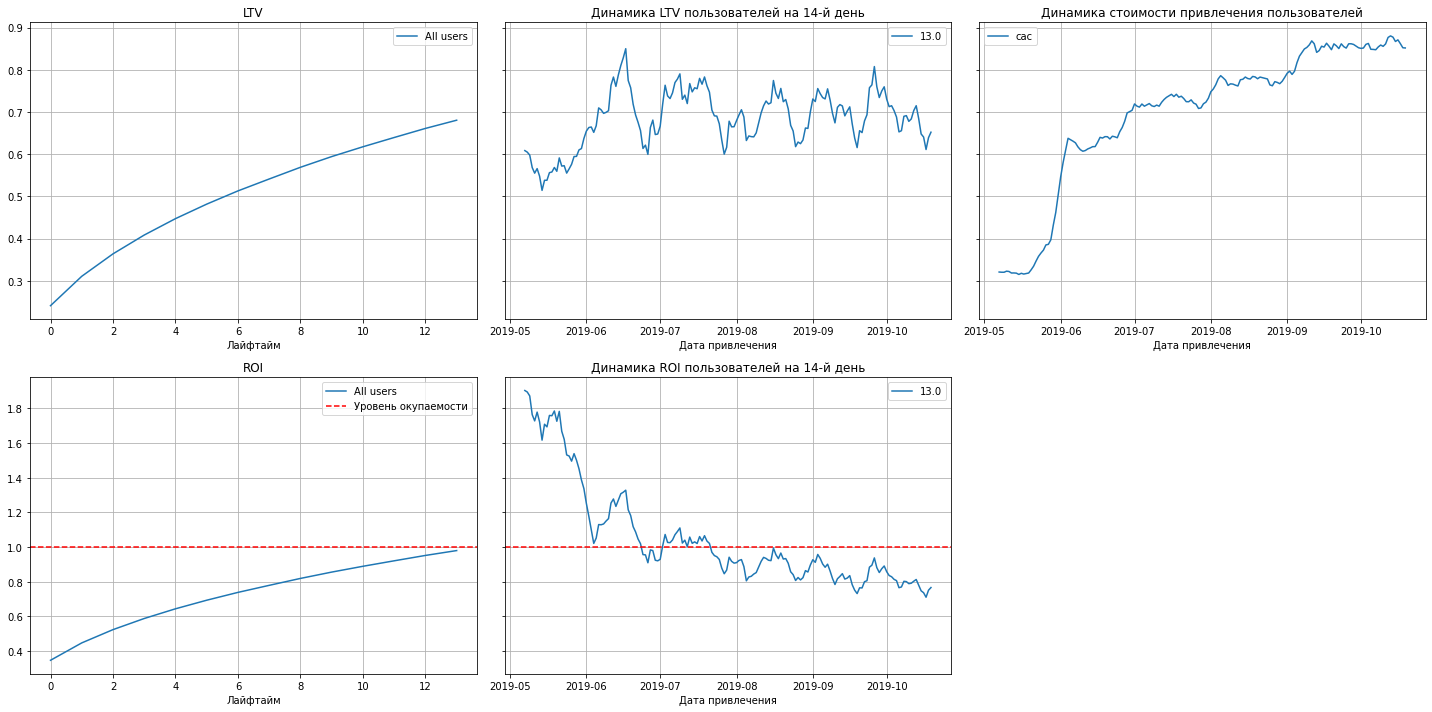

In [31]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles, orders, observation_date, horizon_days)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Рассчитаем LTV и ROI, построим графики для всех пользователей за исключением органических:

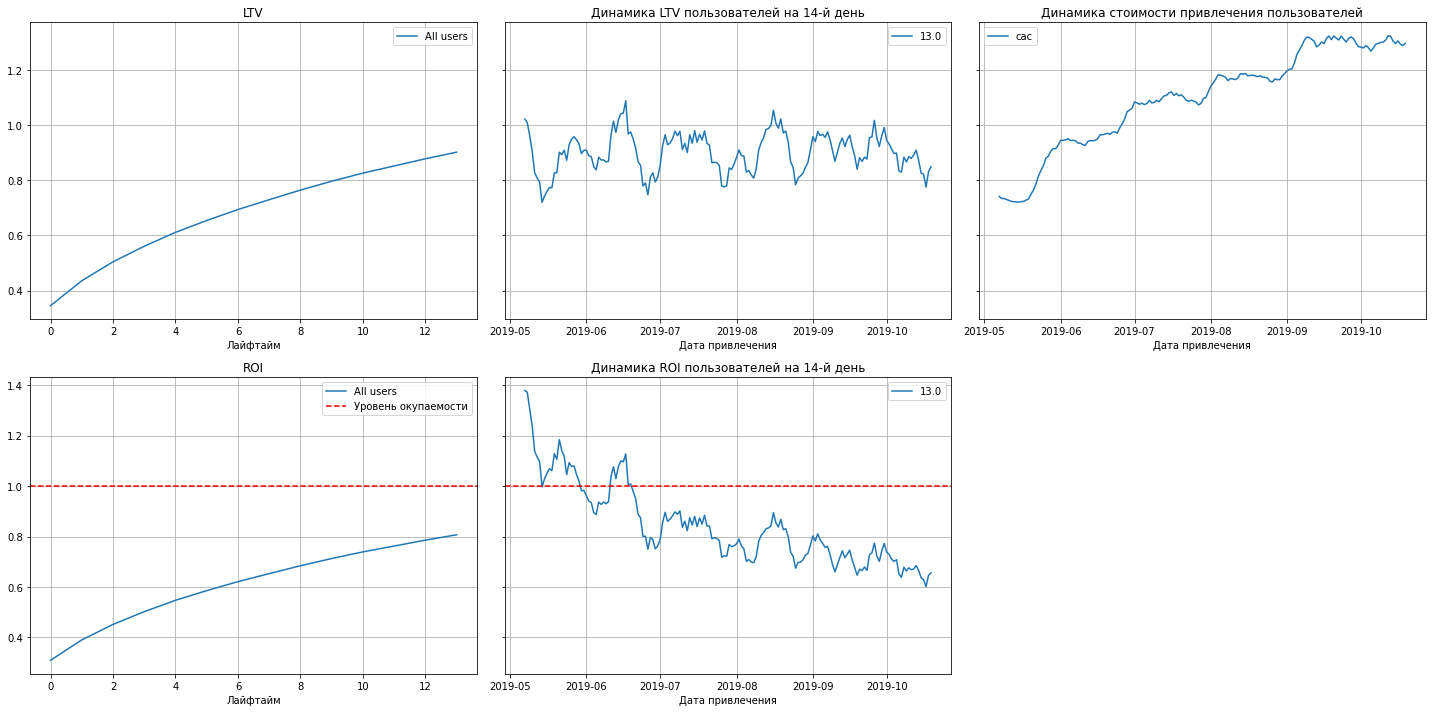

In [32]:
profiles_rek = profiles.loc[profiles['channel'] != 'organic']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles_rek, orders, observation_date, horizon_days)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

`Вывод: отличия графиков, построенных для датафреймов с органическими пользователями (1) и без (2), заключаются в том что пожизненная ценность для данных 1 ниже, чем для данных 2, поскольку органические пользователи намного реже конвертируются в покупателей. Динамика стоимости привлечения для данных 2 выше, поскольку мы исключили бесплатно привлеченных пользователей. Коэффициент рентабельности инвестиций для данных 1 практически достигает 1, для данных 2 - около 0,8. Динамика коэффициента рентабельности снижается более активно для данных 2 (пользователи перестают окупаться в середине июня), чем для данных 1 (пользователи перестают окупаться ближе к августу).
Поскольку нам нужно проанализировать окупаемость рекламы, а органические пользователи заметно изменяют картину, далее будем проводить анализ без них.`

Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.

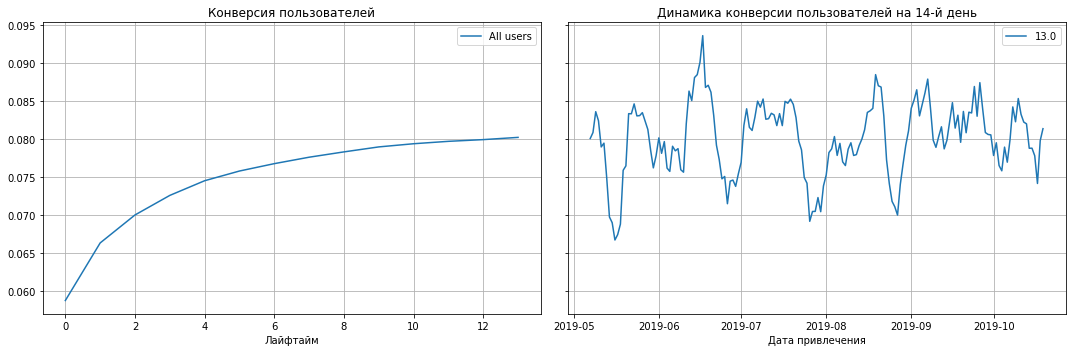

In [33]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(profiles_rek, orders, observation_date, horizon_days)
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

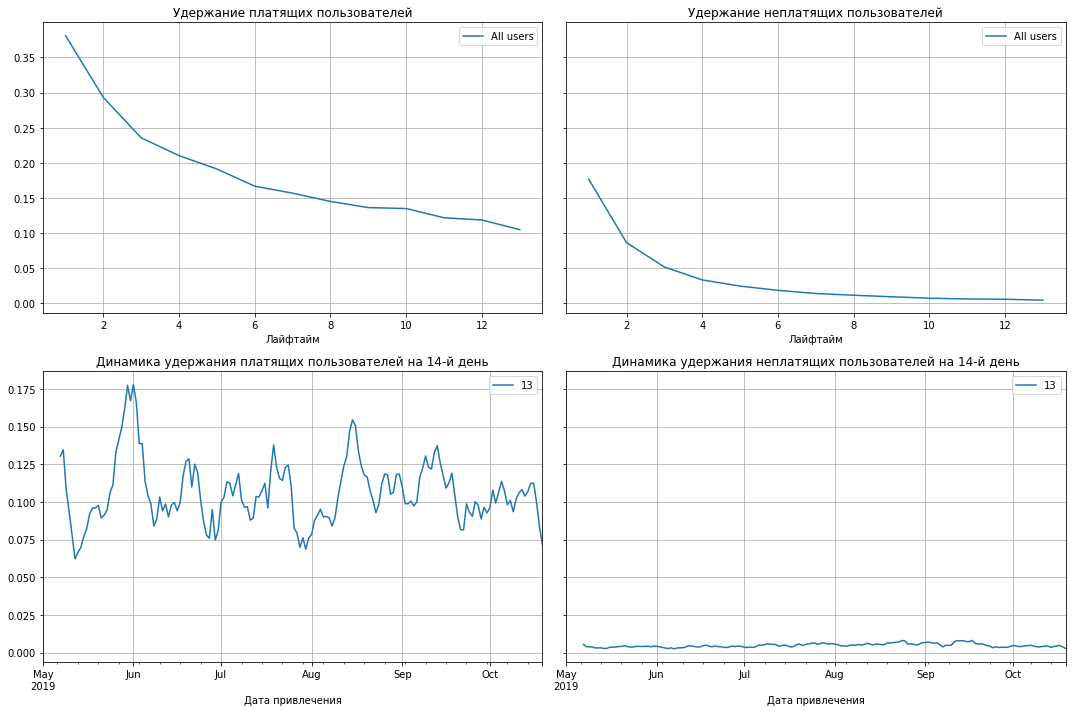

In [34]:
retention_raw, retention_grouped, retention_history = get_retention(profiles_rek, visits, observation_date, horizon_days)
plot_retention(retention_grouped, retention_history, horizon_days) 

`Вывод: конверсия достигает 8 %, динамика конверсии имеет выбросы, но, в целом, довольно стабильна. Удержание платящих пользователей за 2 недели снижается с 37 до 10 %, неплатящих - с 18 до практически 0 %. Динамика удержания платящих пользователей имеет выбросы и незначительный тренд к снижению. Динамика удержания неплатящих пользователей стабильна.`

Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

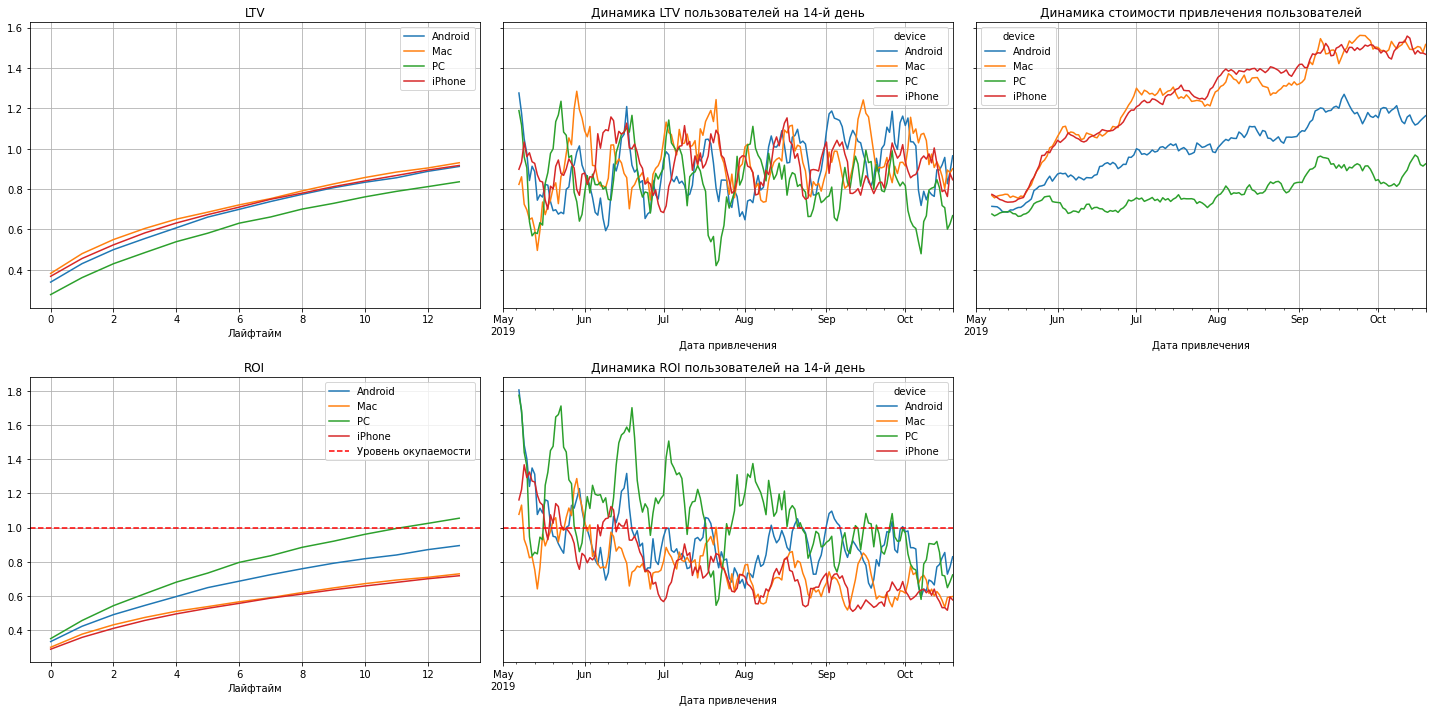

In [35]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles_rek, orders, observation_date, horizon_days, dimensions=['device'])
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

`Вывод: LTV для пользователей PC самая низкая (для всех остальных, в целом, идентичная), однако только пользователи этого устройства окупаются (через 12 дней). Стоимость привлечения обладателей устройств Apple (Iphone и Mac) растет активнее всего. Пользователи Apple перестают окупаться уже в июне, тогда как пользователи PC к концу августа. В целом, в октябре не окупаются пользователи ни одного устройства.`

Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

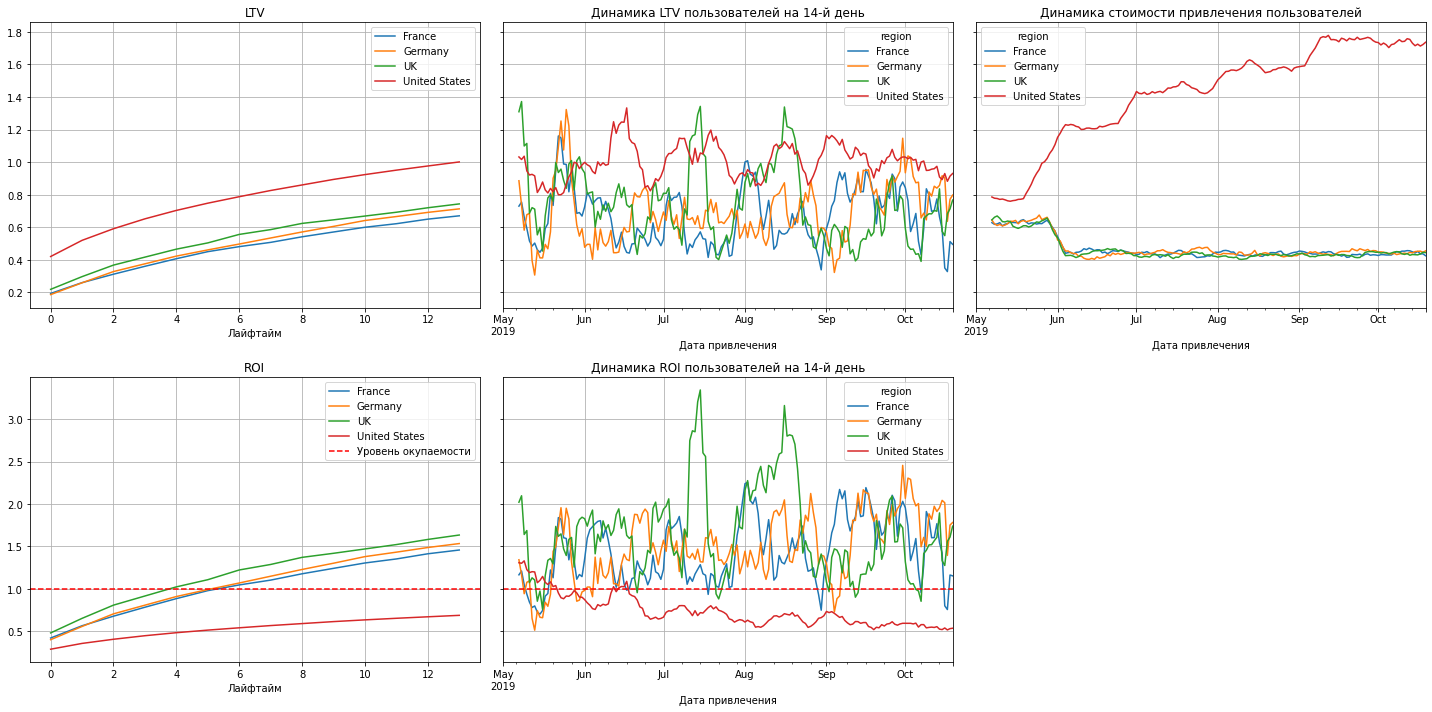

In [36]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles_rek, orders, observation_date, horizon_days, dimensions=['region'])
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

`Вывод: самый высокий LTV принадлежит пользователям из США. С середины мая отмечается активный рост динамики стоимости привлечения пользователей в США (для других стран наоборот - снижение с конца мая). До середины мая реклама в США окупалась, однако затем перестала. Для других стран, наоборот, с конца мая реклама практически всегда окупается. Коэффициент рентабельности превышает 1 на 5 и 6 дни для Великобритании, Франции и Германии. Для США на 14 день он достигает 0,7.`

Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [ ]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles_rek, orders, observation_date, horizon_days, dimensions=['channel'])
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

`Вывод: самый высокий LTV отмечается для lambdaMediaAds и TipTop. Реклама спустя 2 недели не окупается для TipTop, AdNonSense, FaceBoom. Активный рост стоимости привлечения произошел на TipTop. Для изучения отсутствия окупаемости рекламы в США и каналов, которые привели к активному росту динамики стоимости привлечения пользователей построим еще несколько графиков.`

Дополнитель построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI по рекламным каналам для США и остальных стран.

In [ ]:
profiles_rek_usa = profiles_rek.loc[profiles['region'] == 'United States']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles_rek_usa, orders, observation_date, horizon_days, dimensions=['channel'])
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

In [ ]:
profiles_rek_nonusa = profiles_rek.loc[profiles['region'] != 'United States']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles_rek_nonusa, orders, observation_date, horizon_days, dimensions=['channel'])
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

`Вывод: из дополнительно построенных графиков видно, что в США самый высокий LTV для канала TipTop, однако и стоимость рекламы для него выросла более, чем в 3 раза и является самой высокой. Для остальных каналов стоимость рекламы довольно стабильна. Реклама окупается для пользователей, привлеченных рекламой на каналах YRabbit, MediaTornado, RocketSuperAds. Динамика ROI для пользователей с RocketSuperAds имеет восходящий тренд.
В Европе самый высокий LTV для канала lambdaMediaAds. Стоимость рекламы стабильна для всех каналов. Реклама всех каналов окупается максимально на 6 день, за исключением канала AdNonSense, это связано с самой дорогой рекламой и средним LTV.`

**Вывод:**
Окупается ли реклама, направленная на привлечение пользователей в целом?
Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
Чем могут быть вызваны проблемы окупаемости?
- В целом, реклама, направленная на привлечение пользователей, не окупается;
- Наиболее негативное влияние на окупаемость оказывают устройства Apple (Iphone, Mac), устройства Android также не окупаются;
- Не окупается реклама только в США;
- В США не окупается реклама из каналов TipTop, FaceBoom, в Европе - AdNonSense;
- Проблемы окупаемости вызваны высокой стоимостью рекламы.

Рекомендуется рассмотреть возможность больше давать рекламы в США на каналах YRabbit, MediaTornado, RocketSuperAds (преимущественно). Также обсуждать скидки на стоимость рекламы на канале TipTop (30-50 %), либо отказываться от него. FaceBoom не повышает стоимость рекламы, однако LTV для него средний, и он не окупается, можно отказаться от данного канала. В Европе необходимо делать максимальный акцент на канал lambdaMediaAds из-за наибольшего LTV и самой быстрой окупаемости. Также можно обсудить систему скидок на размещение рекламы на канале AdNonSense, поскольку он единственный не окупается. Если будет отказ, то нужно прекращать с ними сотрудничество. Вложения в рекламу на остальных каналах также можно постепенно увеличивать и смотреть в динамике эффект.    

### Напишите выводы

1. Большинство пользователей приходит из США, меньше всего из Германии. Большинство платящих пользователей также приходится на США, меньше всего платящих пользователей находится во Франции;
2. Большинство трат приходится на рекламные источники: TipTop (около 52 % от всех затрат) и FaceBoom (около 31 % от всех затрат). Траты на остальные источники составляют менее 5 % от общих затрат;
3. На "органическую" публику приходится больше 37 % привлеченных пользователей, однако, они превращаются в покупателей реже всего;
4. Окупаемость рекламы проводилась без учета органических пользователей;
5. Конверсия достигает 8 %, динамика конверсии имеет выбросы, но, в целом, довольно стабильна; 
6. Удержание платящих пользователей за 2 недели снижается с 37 до 10 %, неплатящих - с 18 до практически 0 %;
7. Реклама не окупается только в США;
8. В США не окупается реклама из каналов TipTop, FaceBoom, в Европе - AdNonSense;
9. Проблемы окупаемости вызваны высокой стоимостью рекламы.

**Рекомендации:**
1. Рекомендуется рассмотреть возможность давать больше рекламы в США на каналах YRabbit, MediaTornado, RocketSuperAds (преимущественно);
2. Обсудить скинду на стоимость рекламы на канале TipTop (30-50 %), либо отказываться от него;
3. Отказаться от рекламы на канале FaceBoom;
4. Найти новые каналы привлечения в США;
5. В Европе необходимо делать максимальный акцент на канал lambdaMediaAds из-за наибольшего LTV и самой быстрой окупаемости;
6. Обсудить систему скидок на размещение рекламы на канале AdNonSense, поскольку он единственный не окупается. Если будет отказ, то нужно прекращать с ними сотрудничество и перевести средства на рекламу в другие каналы.
